In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from datetime import date

start = str(input('Enter starting date(yyyy-mm-dd): '))
end = str(input('Enter ending date(yyyy-mm-dd): '))
df = data.DataReader('AAPL','yahoo', start, end)

Enter starting date(yyyy-mm-dd): 2018-01-01
Enter ending date(yyyy-mm-dd): 2022-01-1


In [2]:
df = df.reset_index()

Text(0, 0.5, 'Price')

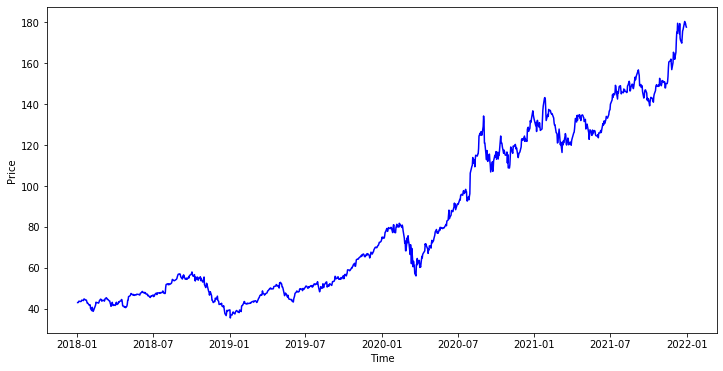

In [3]:
plt.figure(figsize = (12,6))
plt.plot(df.Date, df.Close, 'b')
plt.xlabel('Time')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

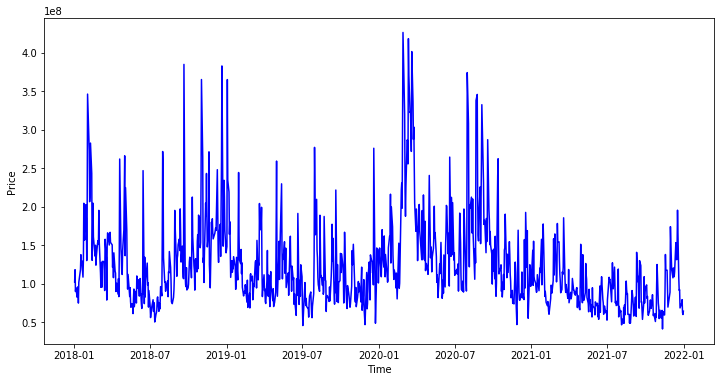

In [4]:
plt.figure(figsize = (12,6))
plt.plot(df.Date, df.Volume, 'b')
plt.xlabel('Time')
plt.ylabel('Price')

In [5]:
ma_days1 = int(input("Enter number of days of moving average first:"))
ma_days2 = int(input("Enter number of days of moving average second:"))
ma1 = df.Close.rolling(ma_days1).mean()
ma2 = df.Close.rolling(ma_days2).mean()

Enter number of days of moving average first:100
Enter number of days of moving average second:200


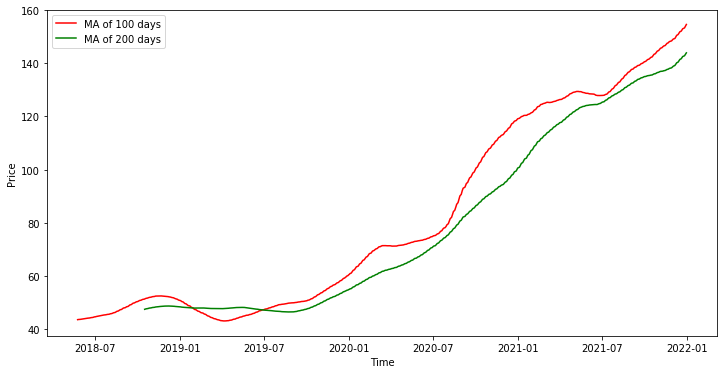

In [6]:
plt.figure(figsize = (12,6))
plt.plot(df.Date, ma1, 'r',label='MA of 100 days')
plt.plot(df.Date, ma2, 'g',label='MA of 200 days')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

Text(0.5, 1.0, 'AAPL volatility:32.93%')

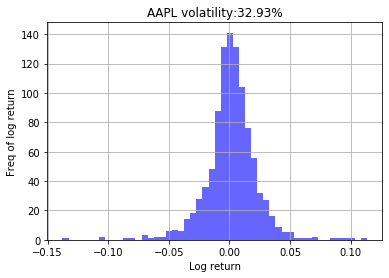

In [7]:
df['Log returns'] = np.log(df['Close']/df['Close'].shift())
df['Log returns'].std()
volatility = df['Log returns'].std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
df['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("AAPL volatility:" + str_vol + "%")